<a href="https://colab.research.google.com/github/OmamaSajid/deeplearning/blob/main/ResNet_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms,models
import os

In [3]:
data_transforms={     #applying diff op on image to make model get used to diff pics (good for training)
    'train':transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val':transforms.Compose([ #need clean images for validation
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

    ])
}


In [4]:
!git clone https://github.com/AarohiSingla/Image_classification_using_pytorch.git


Cloning into 'Image_classification_using_pytorch'...
remote: Enumerating objects: 6945, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6945 (delta 1), reused 2 (delta 0), pack-reused 6939 (from 1)
Receiving objects: 100% (6945/6945), 146.59 MiB | 36.68 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (6927/6927), done.


In [5]:
data_dir = '/content/Image_classification_using_pytorch/Flowers_Classification_dataset'


In [6]:
data_dir = '/content/Image_classification_using_pytorch/Flowers_Classification_dataset'

image_load = {  #loading the data first
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}


In [7]:
print("Classes:", image_load['train'].classes)
print("Training images:", len(image_load['train']))
print("Validation images:", len(image_load['val']))


Classes: ['daisy', 'dandelion']
Training images: 6375
Validation images: 364


In [8]:
dataload={x:torch.utils.data.DataLoader(image_load[x],batch_size=4,shuffle=True,num_workers=2)for x in ['train','val']}
dataset_sizes={x:len(image_load[x])for x in ['train','val']} #using batch size 4 img a one moment to model
print(dataset_sizes)
class_names=image_load['train'].classes
class_names

{'train': 6375, 'val': 364}


['daisy', 'dandelion']

In [9]:
model =models.resnet18(pretrained=True)
for name,param in model.named_parameters():
  if "fc" in name:
    param.requires_grad=True
  else:
    param.requires_grad=False
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 87.3MB/s]


In [11]:
num_ephocs=10
for ephoch in range(num_ephocs):
  for phase in ['train','val']:
    if phase=='train':
      model.train()
    else:
      model.eval()
    running_loss=0.0
    running_corrects=0
    for inputs,labels in dataload[phase]:
      inputs=inputs.to(device)
      labels=labels.to(device)
      optimizer.zero_grad()
      with torch.set_grad_enabled(phase=='train'):
        outputs=model(inputs)
        _,pred=torch.max(outputs,1)
        loss=criterion(outputs,labels)
        if phase=='train':
          loss.backward()
          optimizer.step()
      running_loss+=loss.item()*inputs.size(0)
      running_corrects+=torch.sum(pred==labels.data)
    epoch_loss=running_loss/dataset_sizes[phase]
    epoch_acc=running_corrects.double()/dataset_sizes[phase]
    print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
  print("training com")






train Loss: 0.5335 Acc: 0.7900
val Loss: 0.1987 Acc: 0.9286
training com
train Loss: 0.5249 Acc: 0.7978
val Loss: 0.1705 Acc: 0.9313
training com
train Loss: 0.4913 Acc: 0.8066
val Loss: 0.2656 Acc: 0.9093
training com
train Loss: 0.4942 Acc: 0.8055
val Loss: 0.1865 Acc: 0.9231
training com
train Loss: 0.5255 Acc: 0.7955
val Loss: 0.1413 Acc: 0.9478
training com
train Loss: 0.5118 Acc: 0.7975
val Loss: 0.4051 Acc: 0.8379
training com
train Loss: 0.5467 Acc: 0.7986
val Loss: 0.1672 Acc: 0.9396
training com
train Loss: 0.5117 Acc: 0.8049
val Loss: 0.1705 Acc: 0.9258
training com
train Loss: 0.4910 Acc: 0.8088
val Loss: 0.1638 Acc: 0.9423
training com
train Loss: 0.4913 Acc: 0.8083
val Loss: 0.1707 Acc: 0.9451
training com


In [12]:

# Save the model
torch.save(model.state_dict(), 'flower_classification_model.pth')

In [14]:
test_transform = data_transforms['val']
test_transform

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [17]:
from torch.utils.data import DataLoader

In [18]:
test_dir='/content/Image_classification_using_pytorch/Flowers_Classification_dataset/test'
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [19]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No gradients needed for testing
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)  # Get predicted class

        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

test_accuracy = correct / total
print(f"✅ Test Accuracy: {test_accuracy:.4f}")


✅ Test Accuracy: 0.9231


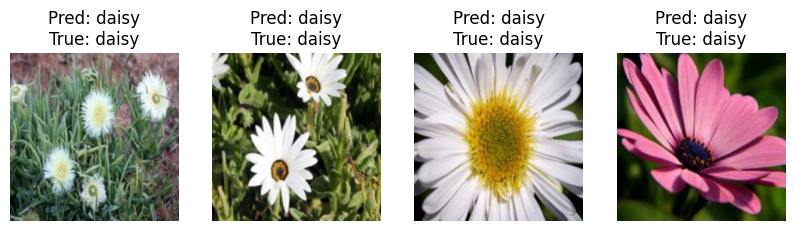

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Helper to unnormalize and show image
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))  # CHW -> HWC
    mean = np.array([0.485, 0.456, 0.406])  # used in Normalize
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # unnormalize
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.axis('off')

# Get a batch from test_loader
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
labels = labels.to(device)

# Predict
model.eval()
with torch.no_grad():
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

# Show images and predictions
plt.figure(figsize=(10, 5))
for i in range(min(4, len(inputs))):
    plt.subplot(1, 4, i + 1)
    imshow(inputs[i].cpu())
    plt.title(f"Pred: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}")


In [22]:
import torch
import torch.nn as nn
from torchvision import models

# Rebuild the same model structure used during training
model = models.resnet18(pretrained=False)  # no need to load pretrained again
model.fc = nn.Linear(model.fc.in_features, 1000)  # 2 output classes

# Load the saved weights
model.load_state_dict(torch.load('flower_classification_model.pth'))

# Move to device and eval mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
# Perform inference
input_batch = input_batch.to(device)

with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

The predicted class is: dandelion


In [27]:
image_path = '/gdrive/My Drive/AI_demos/test1.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [24]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [26]:
from PIL import Image
